# Kannusteet, työllistymis- ja efektiivinen veroaste
Antti Tanskanen,
1.2.2022

Efektiivinen veroaste kertoo, paljonko ansaituista lisäansioista menee verojen kasvamiseen ja etuuksien pienenemisen. Työllistymisveroaste taas kertoo, mikä osuus siirtyminen työttömyydestä työhön tuomista palkkatuloista menee veroihin ja etuuksien pienenemiseen. Tulokset ovat erilaisille perheille erilaisia, erityisesti johtuen erilaisista etuuksista. Työllistymisveroaste määritellään

$$
V=1-\frac{T_2-T_1}{\Delta t},
$$

missä $T_1$ on nettotulot työttömänä sisältäen etuudet, $T_2$ on nettotulot työllistyneenä, $\Delta t$ on työstä saatava palkka. Efektiivinen marginaalivero lasketaan samalla kaavalla.

Jos esimerkiksi työttömänä käteen jää 100 e/kk, ja työllistyneenä 500 euron kuukausipalkasta jää 300 e/kk käteen verojen ja etuuksien pienentymisen jälkeen, on työllistymisveroaste 60 prosentti.

Efektiivinen marginaalivero kertoo, paljonko lisätulosta menee veroihin yms. Jos tulotaso nyt on 1500 e/kk ja siitä jää käteen etuudet mukaanlukien 1400 e/kk. Jos lisätyöllä bruttotulon saa nostettua 2000 euroon kuukaudessa, josta jää 1600 e/kk käteen (etuudet mukana), on efektiivinen veroaste 60 prosenttia.

Tarkempaa tietoa veroasteiden laskennasta löytyy esimerkiksi julkaisuista Kärkkäinen ja Tervola [2018] ja Viitamäki [2015].

## Python-kirjasto

Tässä työkirjassa esitellään Python-kirjasto fin_benefit, jonka avulla on helppo tarkastella käteen jäävien tulojen osuutta, efektiivistä marginaaliveroa ja työllistymisveroastetta. Kirjasto on melko suppea, noin 2 000 riviä koodia yhteensä.

In [1]:
# for Colab, install fin_benefits from Github
#!pip install git+https://github.com/ajtanskanen/benefits.git

In [2]:
# haetaan tarpeelliset kirjastot
import fin_benefits # määrittelee luokan, jossa on sosiaaliturvafunktiot yms
import numpy as np 

# kuvat suuremmiksi
import matplotlib.pyplot as plt

include_alv=False

plt.rcParams['figure.figsize'] = [10, 5]
imagedir='kuvat/'

## Tyyppitapauksia ja niiden korvausasteita

Laskee työllisyysveroaste, työnteon efektiivisen marginaalivero ja käteen jäävä ansio kirjaston avulla. Valitaan ensin tyyppitapaus. Muuttuja p kertoo tarkat tiedot laskennankohteesta, selite sisältää kuvauksen siitä ja parametri tulosta kehottaa printtaamaan selite:en.

In [3]:
p,selite=fin_benefits.perheparametrit(perhetyyppi=64,kuntaryhmä=1,vuosi=2023,tulosta=True)
#p,selite=fin_benefits.perheparametrit(perhetyyppi=2,kuntaryhmä=1,vuosi=2023,tulosta=True)

2 aikuista ja 1 lapsi. Työtön (työmarkkinatuki), puoliso työtön (työmarkkinatuki)


In [4]:
print(p)

{'tyoton': 1, 'ika': 30, 'saa_ansiopaivarahaa': 0, 't': 0, 'vakiintunutpalkka': 2500, 'perustulo': 0, 'asumismenot_toimeentulo': 413, 'asumismenot_asumistuki': 353, 'lapsia': 1, 'lapsia_paivahoidossa': 1, 'aikuisia': 2, 'veromalli': 0, 'kuntaryhma': 0, 'lapsia_kotihoidontuella': 0, 'alle3v': 0, 'ansiopvrahan_suojaosa': 1, 'ansiopvraha_lapsikorotus': 1, 'puoliso_tulot': 0, 'puoliso_tyoton': 1, 'puoliso_vakiintunutpalkka': 2500, 'puoliso_saa_ansiopaivarahaa': 0, 'puoliso_tyottomyyden_kesto': 100, 'tyottomyyden_kesto': 10, 'saa_elatustukea': 0, 'elakkeella': 0, 'tyoelake': 0, 'opiskelija': 0, 'aitiysvapaalla': 0, 'isyysvapaalla': 0, 'kotihoidontuella': 0, 'puoliso_t': 0, 'asumismenot_yhdistetty': 413, 'lapsia_alle_3v': 0, 'lapsia_alle_kouluikaisia': 1, 'puoliso_elakkeella': 0, 'puoliso_opiskelija': 0, 'puoliso_tyoelake': 0, 'puoliso_aitiysvapaalla': 0, 'puoliso_isyysvapaalla': 0, 'puoliso_sairauspaivarahalla': 0, 'puoliso_kotihoidontuella': 0}


In [5]:
fin_benefits.print_examples()

Tapaus 1:
1 aikuinen, ei lapsia. Töissä, ei puolisoa

Tapaus 2:
1 aikuinen, ei lapsia. Työtön (ansiopvraha, peruste 2500 e/kk), ei puolisoa

Tapaus 3:
1 aikuinen, ei lapsia. Työtön (työmarkkinatuki), ei puolisoa

Tapaus 4:
1 aikuinen ja 1 lapsi. Töissä, ei puolisoa

Tapaus 5:
2 aikuista ja 1 lapsi. Töissä, puoliso töissä (1250 e/kk).

Tapaus 6:
2 aikuista ja 2 lasta. Töissä, puoliso töissä (1250 e/kk).

Tapaus 7:
2 aikuista ja 1 lapsi. Työtön (ansiopvraha, peruste 2500 e/kk), puoliso työtön (ansiopäiväraha, peruste 2500 e/kk).

Tapaus 8:
2 aikuista ja 1 lapsi. Töissä, puoliso töissä (1250 e/kk).

4 1
Tapaus 9:
2 aikuista ja 3 lasta. Töissä, puoliso töissä (1250 e/kk).

Tapaus 10:
1 aikuinen ja 1 lapsi. Työtön (ansiopvraha, peruste 1500 e/kk), ei puolisoa

Tapaus 11:
1 aikuinen ja 3 lasta. Työtön (ansiopvraha, peruste 2500 e/kk), ei puolisoa

Tapaus 12:
2 aikuista ja 2 lasta. Työtön (työmarkkinatuki), puoliso töissä (1250 e/kk).

Tapaus 13:
2 aikuista ja 2 lasta. Työtön (ansiopvraha, pe

Tarkastetaan vielä, millaisia parametrejä p:hen on syötetty

Itse laskenta koostuu kolmesta rivistä koodia. Alustetaan objektia ben kirjastosta fin_benefits. Tämän jälkeen sitä voi kutsua laskemaan marginaalit ja plottamaan ne.

In [6]:
# tarkasteluvuosi
year=2023

min_salary=0
max_salary=5000

# Luokka Benefits sisältää etuuskoodin
ben=fin_benefits.Benefits(year=year)

# Luokka Benefits sisältää etuuskoodin
benHO=fin_benefits.BenefitsHO(year=year)

# Luokka Benefits sisältää etuuskoodin
benHOrev=fin_benefits.BenefitsHOrev(year=year)

# Luokka Marginals sisältää marginaalien plottausfunktiot
marg=fin_benefits.Marginals(ben,year=year,incl_alv=include_alv,lang='eng')

# Luokka Marginals sisältää marginaalien plottausfunktiot
margHO=fin_benefits.Marginals(benHO,year=year,incl_alv=include_alv,lang='eng')

# Luokka Marginals sisältää marginaalien plottausfunktiot
margHOrev=fin_benefits.Marginals(benHOrev,year=year,incl_alv=include_alv,lang='eng')

Ja sitten lasketaan käteen jäävä tulo, efektiivinen marginaalivero, työllistymisveroaste ja osatyöstä kokoaikatyöhön siirtymän efektiivinen marginaalivero. Laskelmat tehdään 1 e/kk askelvälillä. Efektiivinen marginaalivero lasketaan 100 e/kk lisätulolla. Osatyöstä kokoaikatyöhön siirryttäessä palkka kaksinkertaistuu.

# Palkansaajan verotaulukko

Tätä voi käyttää sen verifiointiin, että palkansaajan verot ovat tässä laskettuna samat kuin Veronmaksajien taulukossa.

In [7]:
#marg.verotaulukko(p)

In [8]:
p['saa_elatustukea']=0
p['tyottomyyden_kesto']=0/12*12*21.5
#p['vakiintunutpalkka']=2500
#p['puoliso_vakiintunutpalkka']=200

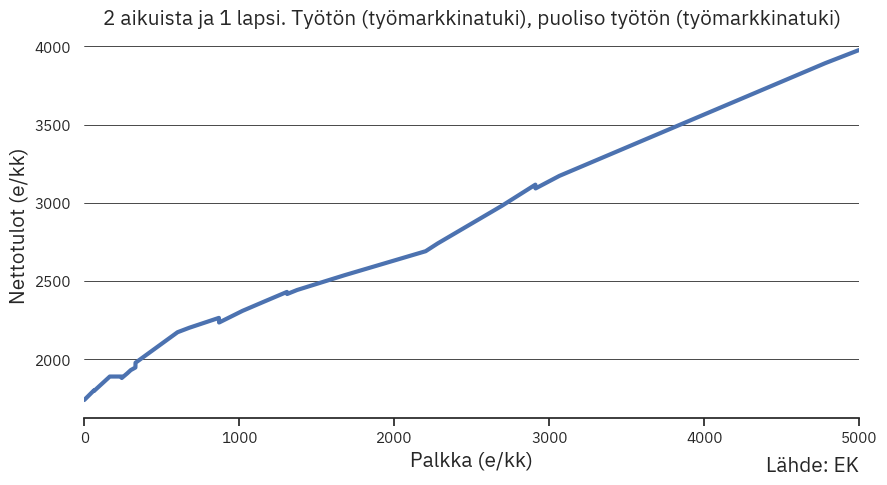

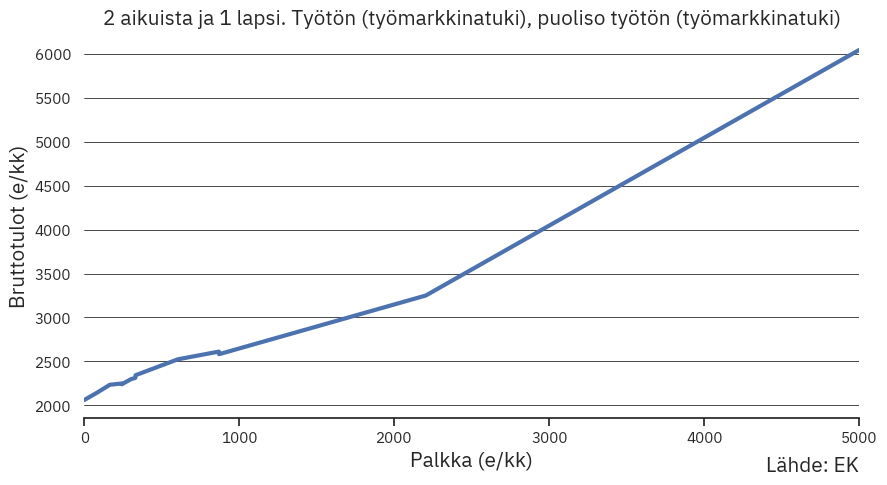

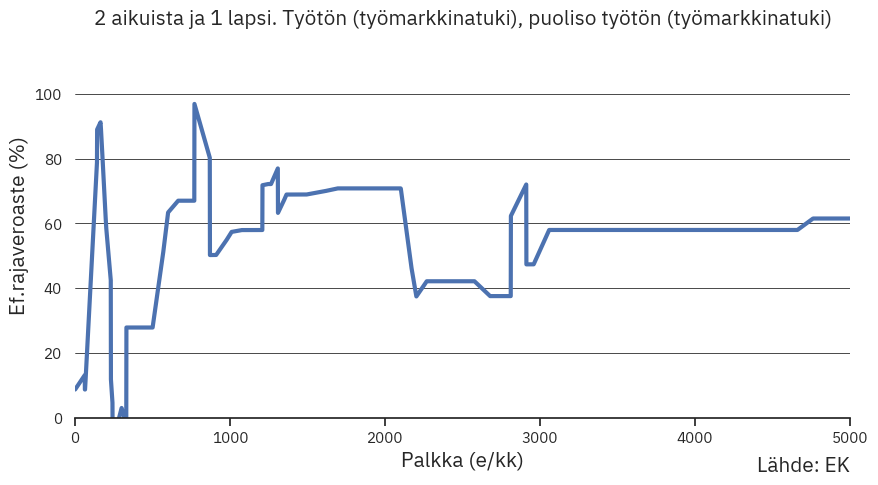

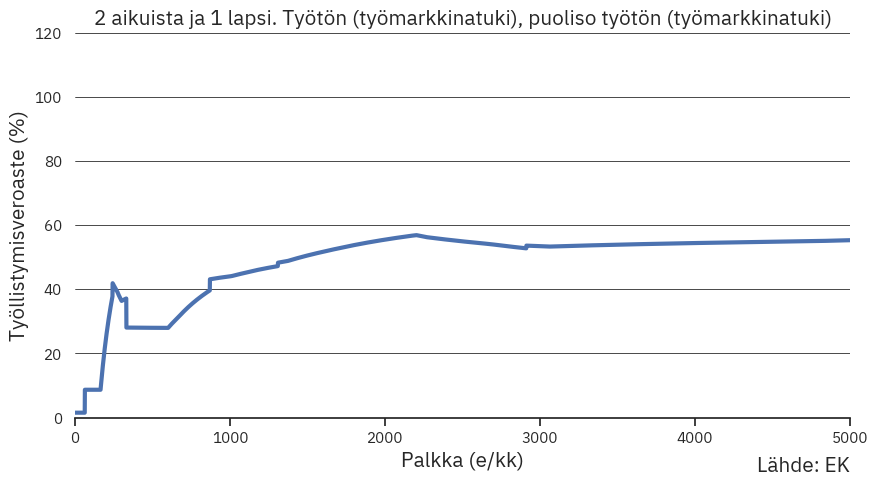

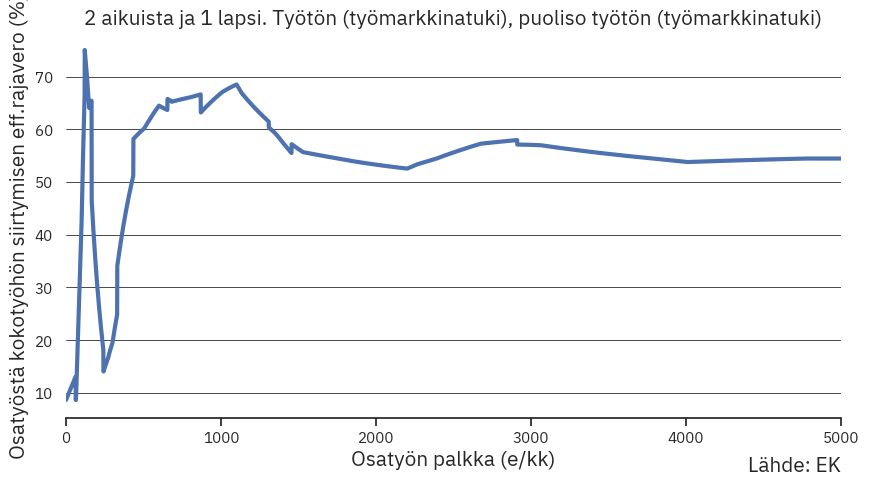

In [9]:
# ja lasketaan & plotataan tulokset
basenetto,baseeff,basetva,baseosatva,basebrutto=marg.laske_ja_plottaa(p,incl_alv=include_alv,
                        min_salary=min_salary,max_salary=max_salary)

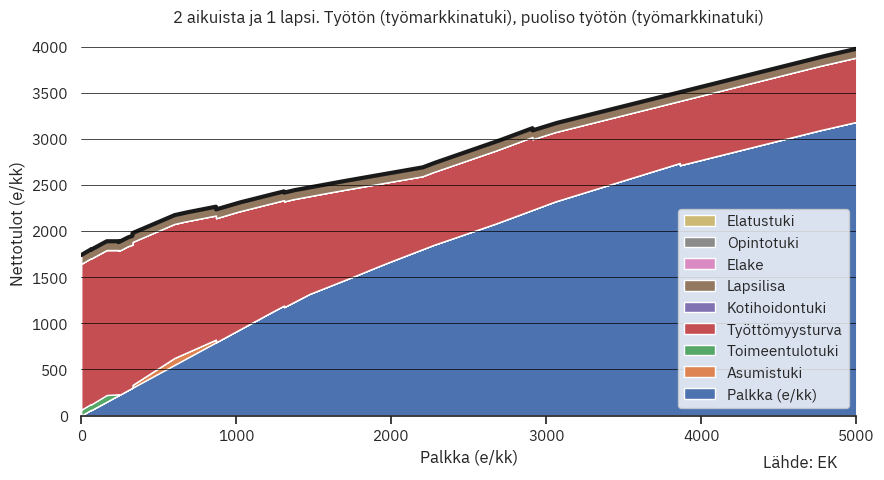

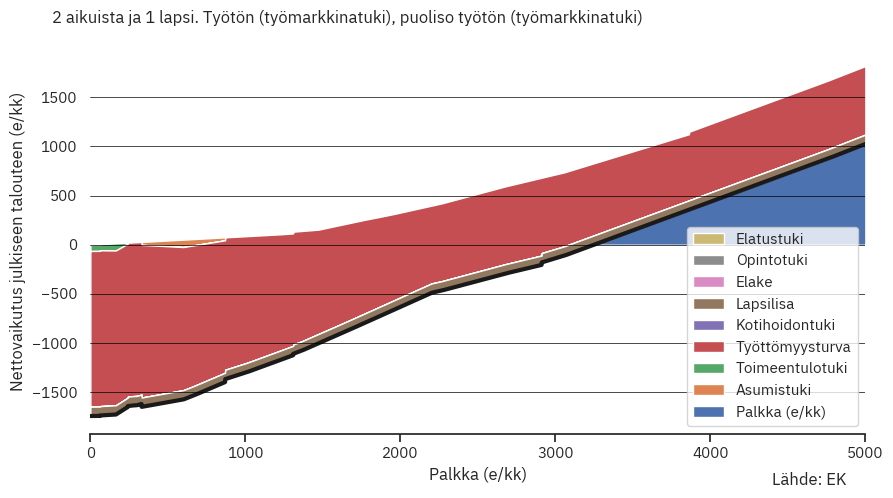

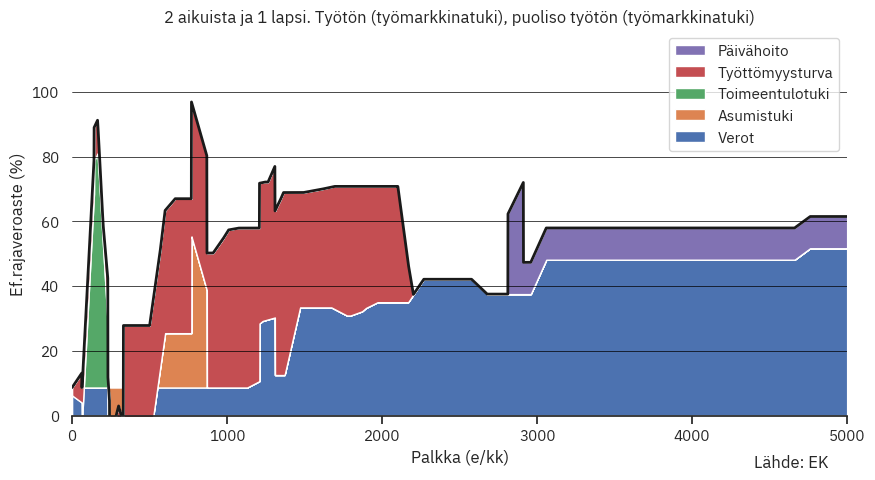

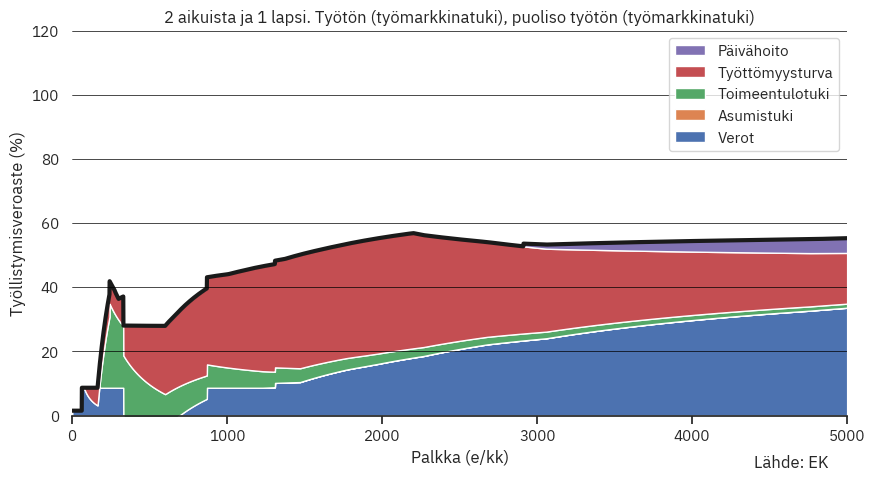

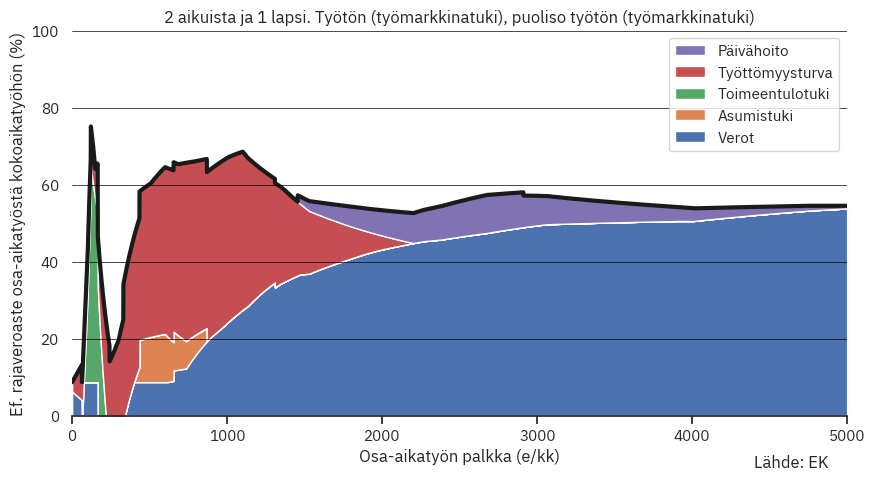

In [10]:
# ja lasketaan & plotataan tulokset
marg.laske_ja_plottaa_marginaalit(p,plot_tva=True,figname=imagedir+'ho_gs_',
                                 grayscale=False,incl_perustulo=False,incl_elake=False,incl_alv=include_alv,
                                 incl_opintotuki=False,max_salary=max_salary,min_salary=min_salary)

# Hallitusohjelma
Etuuslajien muokkaaminen on helppoa: kopioidaan luokka Benefits ja korvataan haluttu etuusmuoto uudella.

Esimerkin vuoksi korvataan toimeentulotuki yhteensovittamattomalla 750 e/kk tuella. Tämä on eräänlainen perustulo, mutta se ei ole kustannusneutraali ilman muutoksia verotukseen

In [11]:
def vaikutus(basenetto,basenetto_HO):
    print(f'Vaikutus nettotuloihin\nei palkkatuloja: {basenetto_HO[0]-basenetto[0]:.2f} e/kk\n'+\
    f'1000 e/kk palkkatuloilla: {basenetto_HO[1000]-basenetto[1000]:.2f} e/kk\n'+\
    f'2000 e/kk palkkatuloilla: {basenetto_HO[2000]-basenetto[2000]:.2f} e/kk\n')

In [12]:
p3=p.copy()

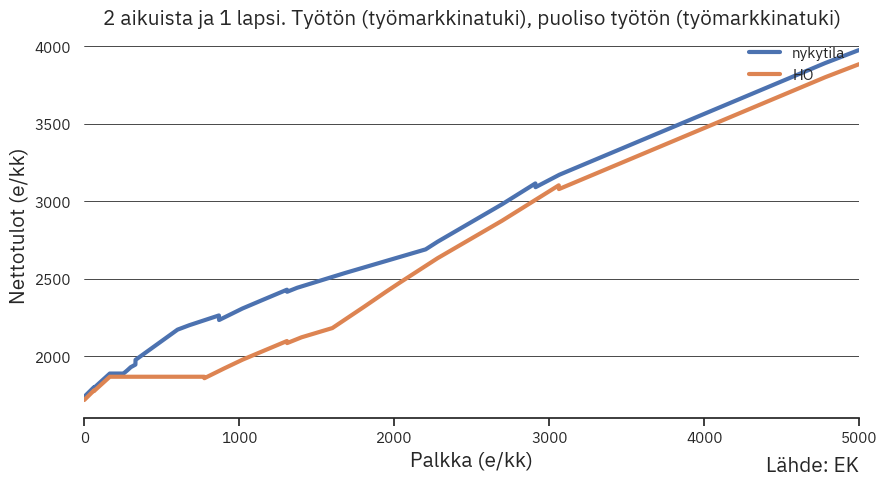

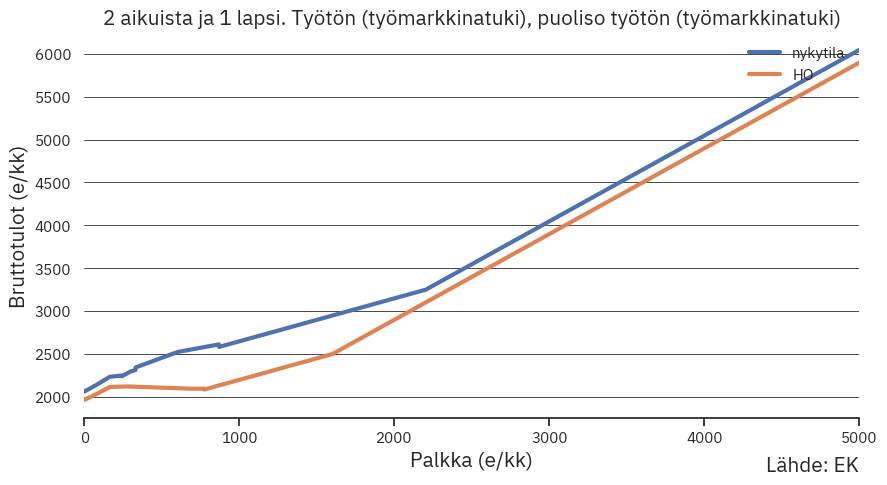

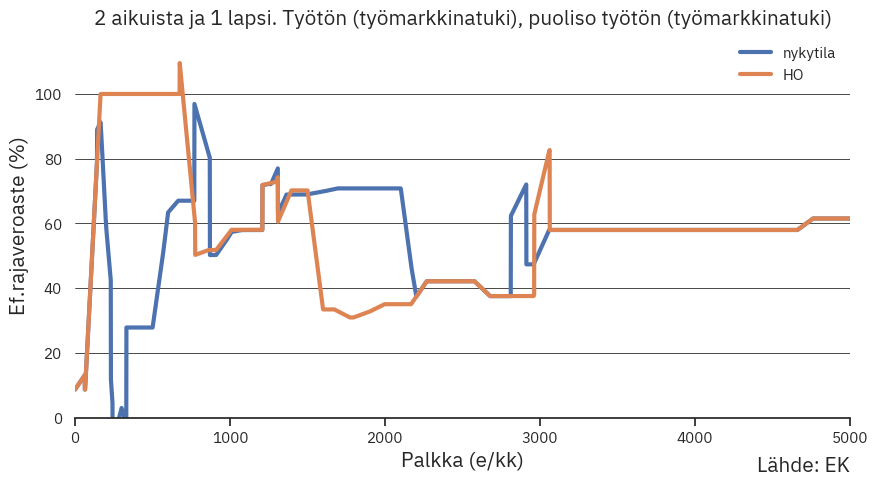

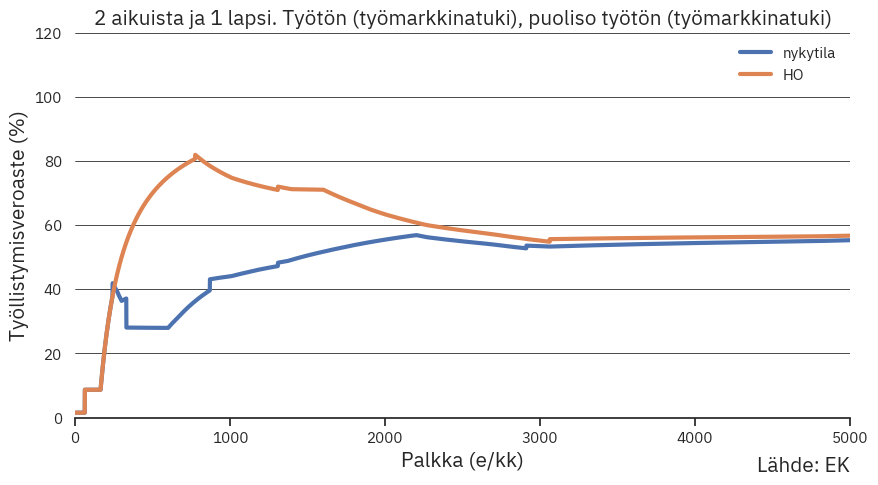

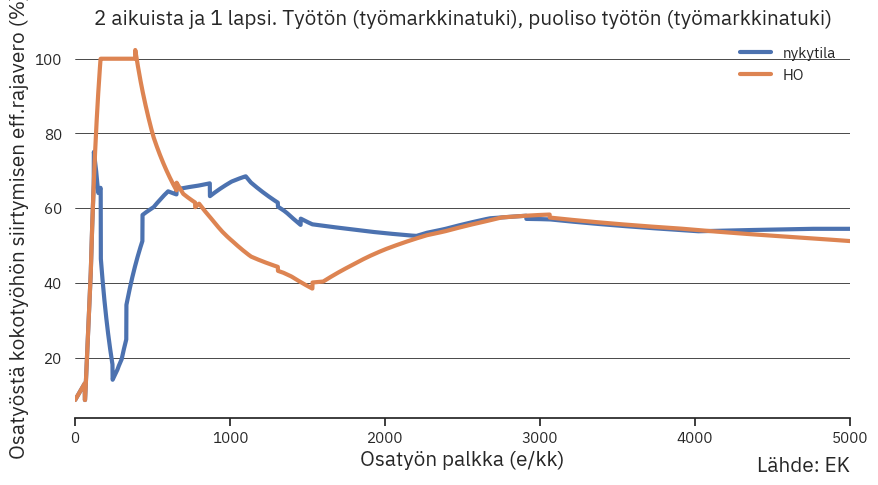

Vaikutus nettotuloihin
ei palkkatuloja: -20.65 e/kk
1000 e/kk palkkatuloilla: -330.07 e/kk
2000 e/kk palkkatuloilla: -178.28 e/kk



In [13]:
# ja lasketaan & plotataan tulokset
basenetto_HO,baseeff_HO,basetva_HO,baseosatva_HO,basebrutto_HO = \
margHO.laske_ja_plottaa(p,basenetto=basenetto,baseeff=baseeff,basetva=basetva,baseosatva=baseosatva,
                        basebrutto=basebrutto,incl_alv=include_alv,otsikko="HO",otsikkobase="nykytila",
                        min_salary=min_salary,max_salary=max_salary)

vaikutus(basenetto,basenetto_HO)

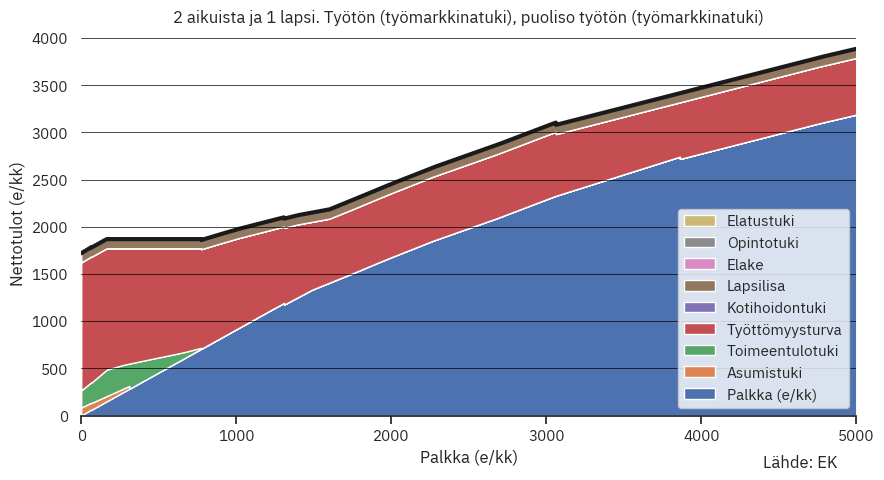

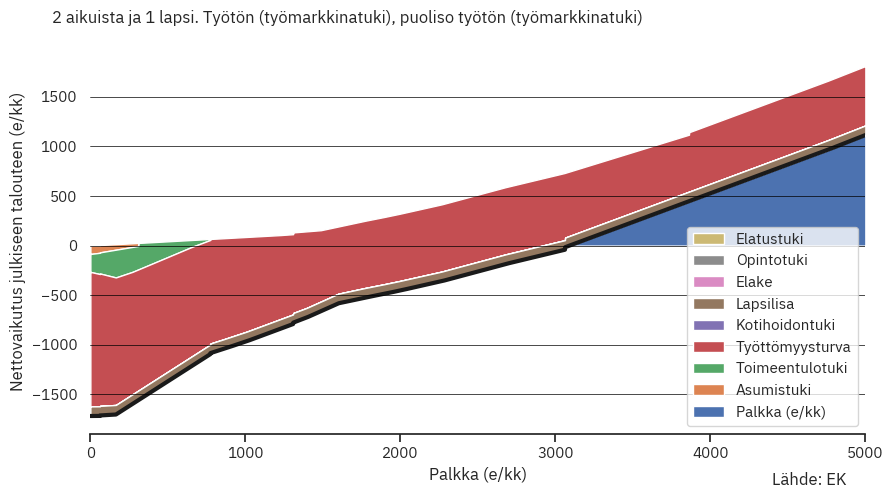

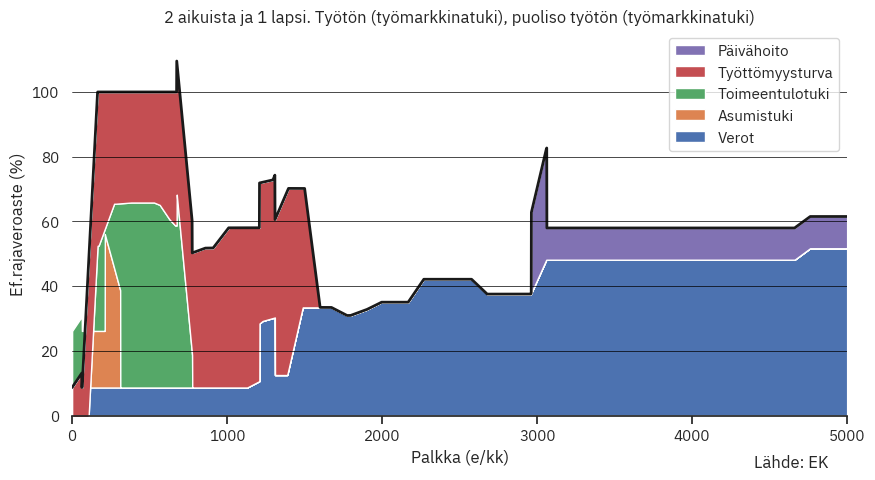

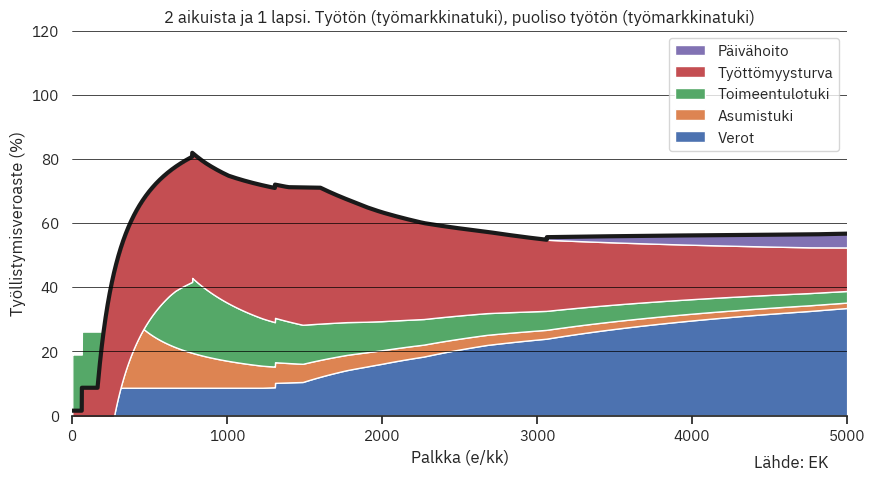

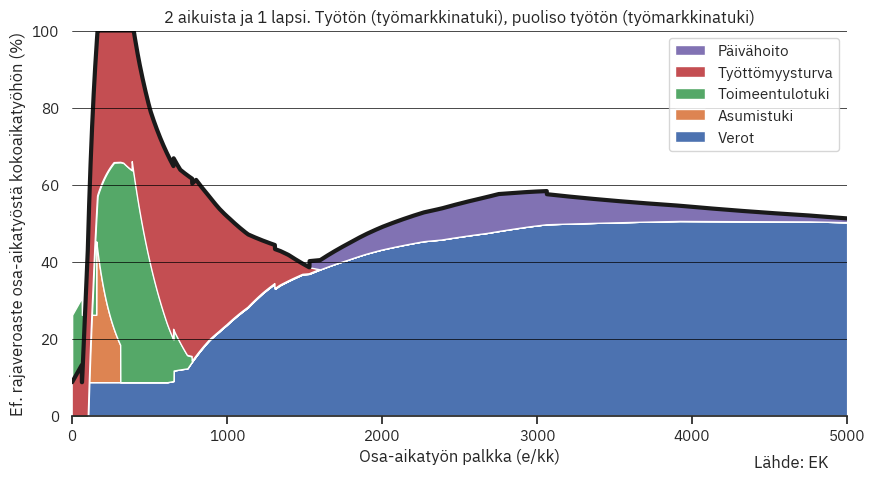

In [14]:
# ja lasketaan & plotataan tulokset
margHO.laske_ja_plottaa_marginaalit(p,plot_tva=True,figname=imagedir+'ho_gs_',
                                 grayscale=False,incl_perustulo=False,incl_elake=False,incl_alv=include_alv,
                                 incl_opintotuki=False,max_salary=max_salary,min_salary=min_salary,
                                    otsikko="HO",otsikkobase="nykytila")

# HO rev

Pidetään ansioturvan suojaosa

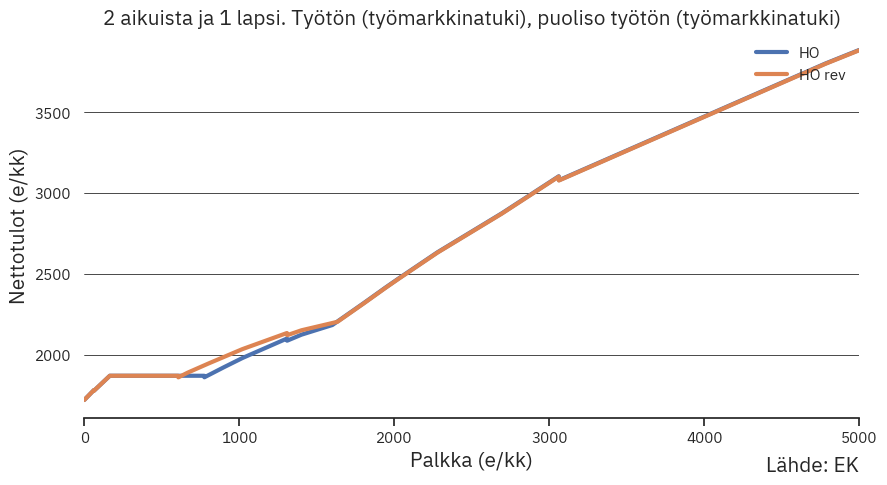

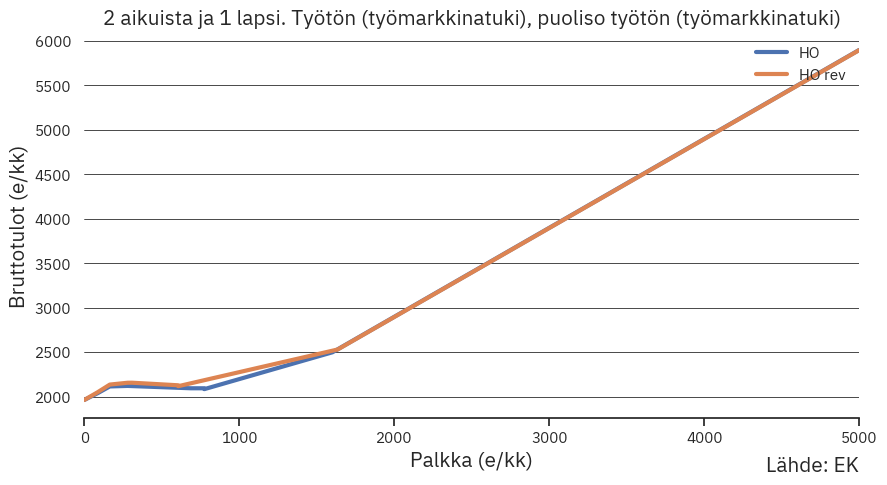

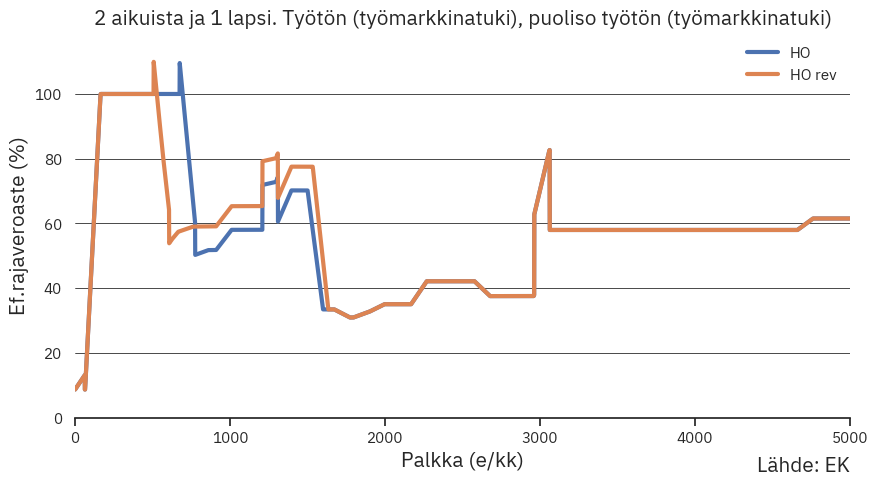

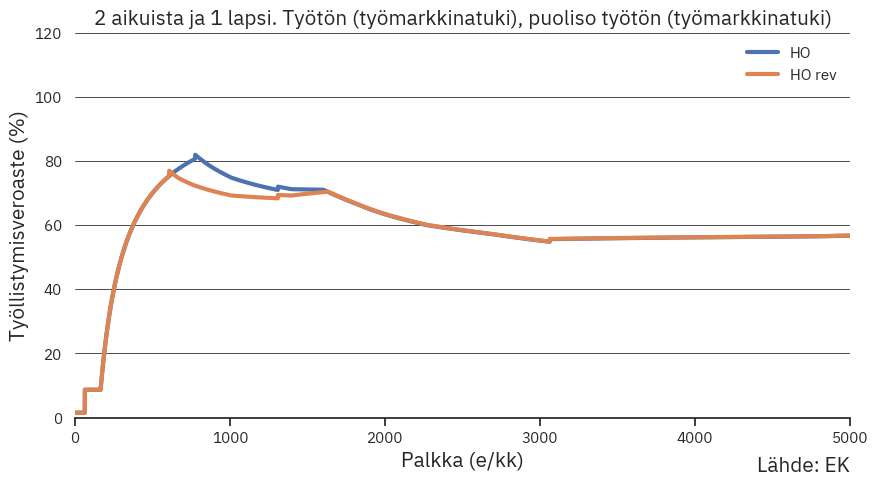

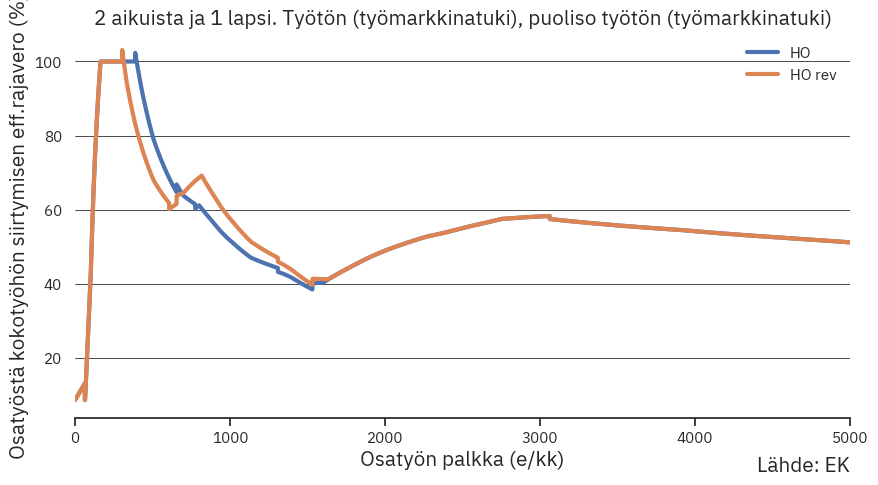

In [15]:
_,_,_,_,_= margHOrev.laske_ja_plottaa(p3,basenetto=basenetto_HO,baseeff=baseeff_HO,
        basetva=basetva_HO,baseosatva=baseosatva_HO,basebrutto=basebrutto_HO,incl_alv=include_alv,
        max_salary=max_salary,min_salary=min_salary,otsikko="HO rev",otsikkobase="HO")


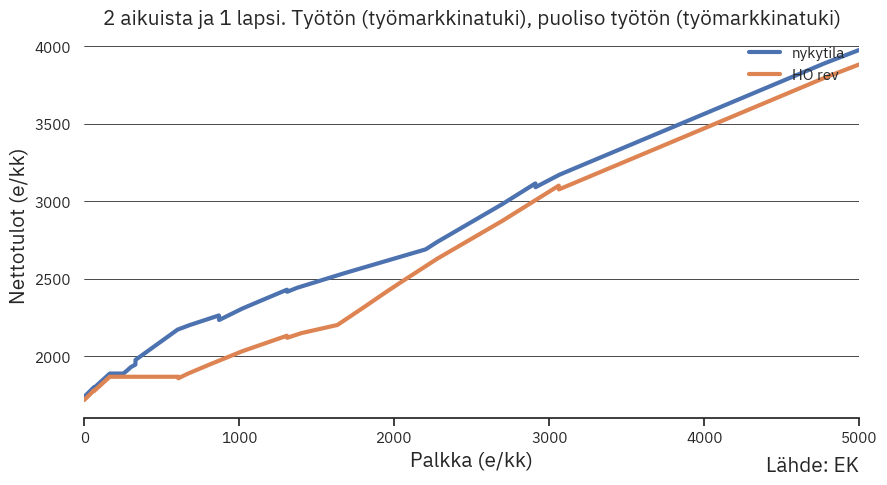

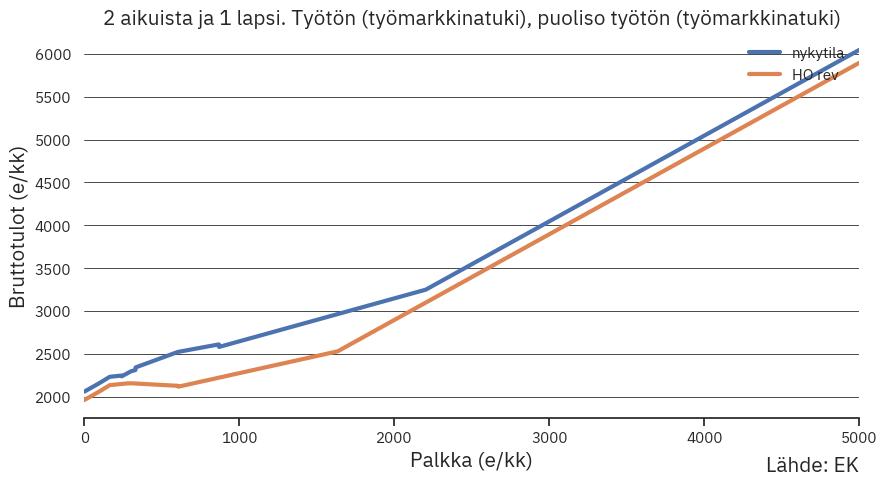

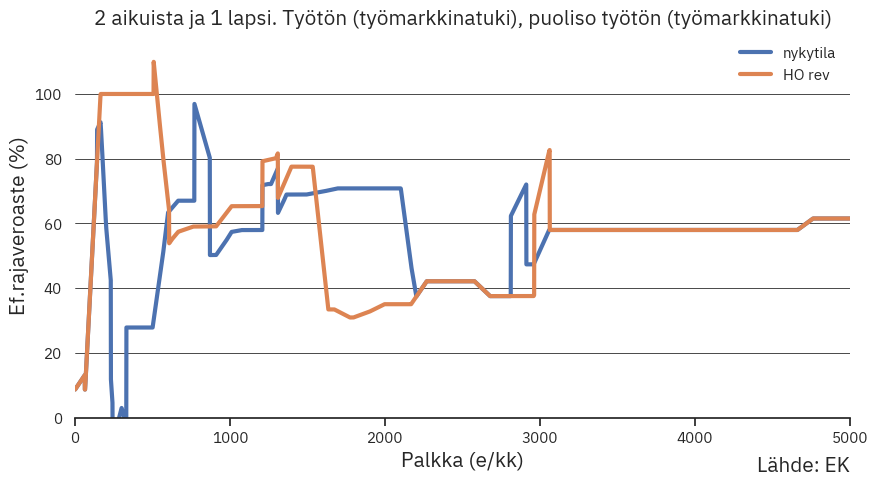

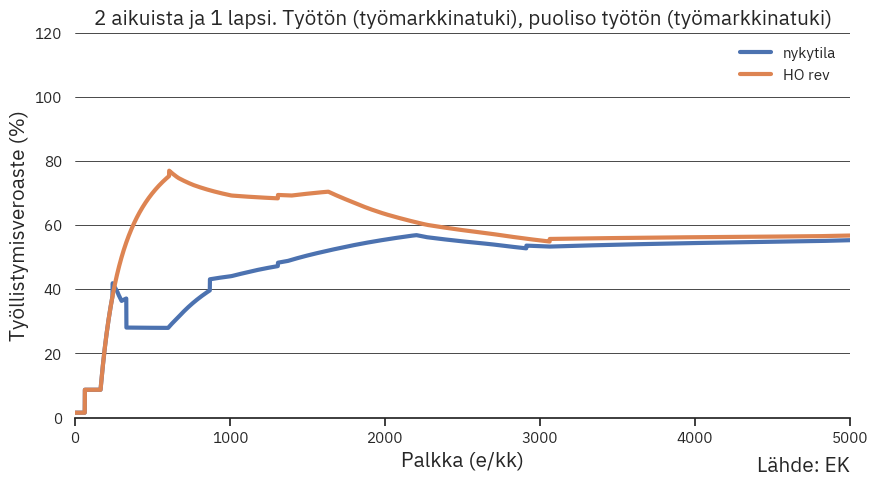

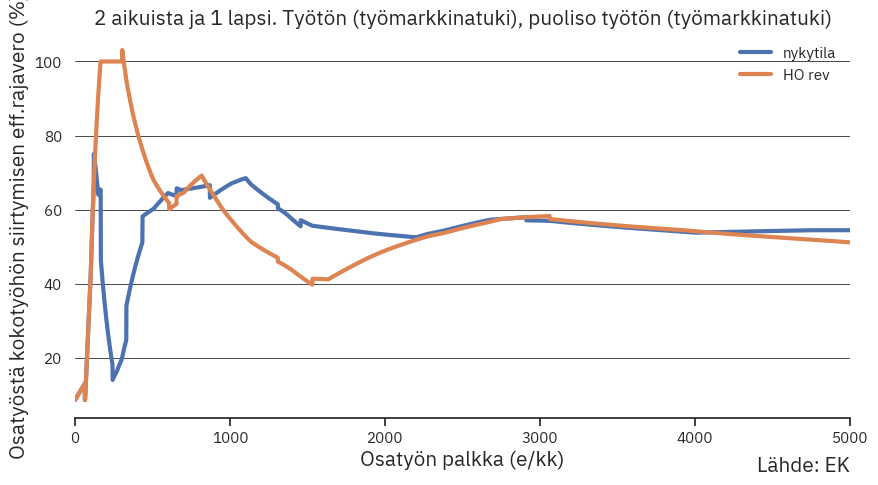

In [16]:
_,_,_,_,_= margHOrev.laske_ja_plottaa(p3,basenetto=basenetto,baseeff=baseeff,
        basetva=basetva,baseosatva=baseosatva,basebrutto=basebrutto,incl_alv=include_alv,
        max_salary=max_salary,min_salary=min_salary,otsikko="HO rev",otsikkobase="nykytila")

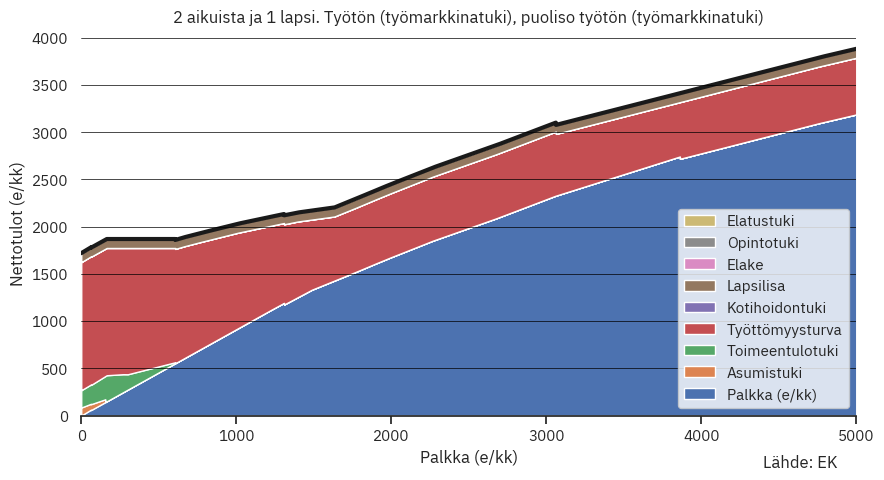

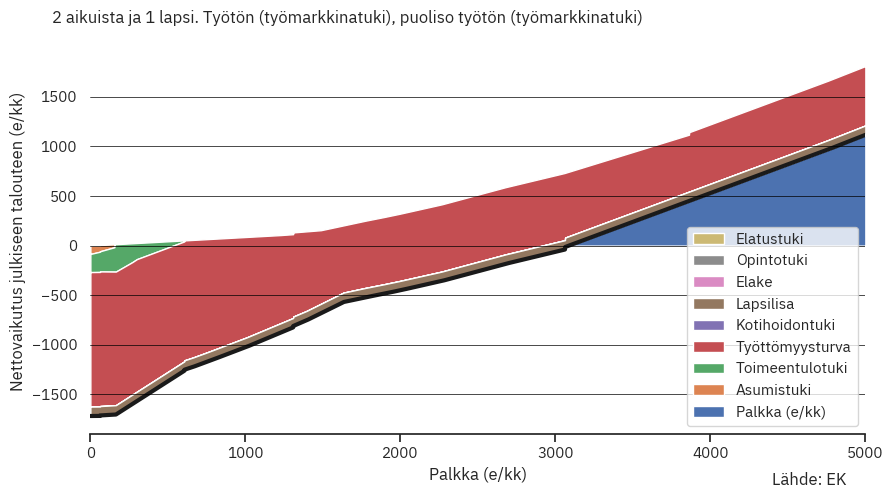

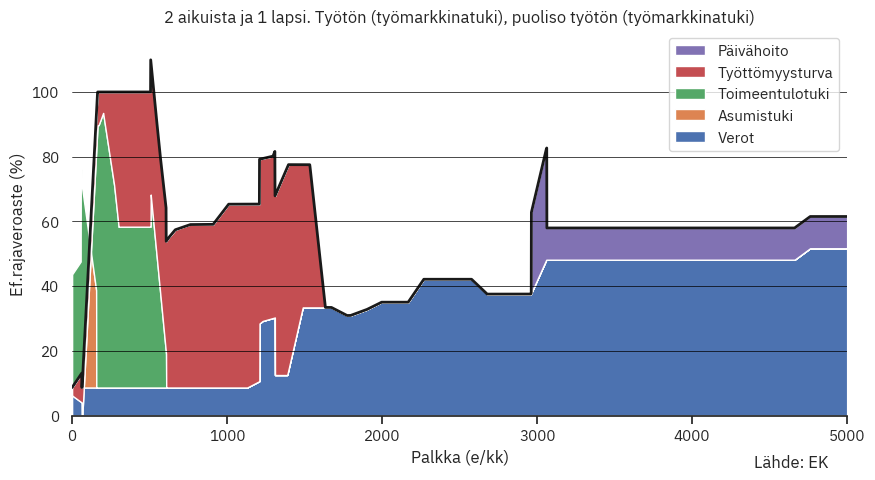

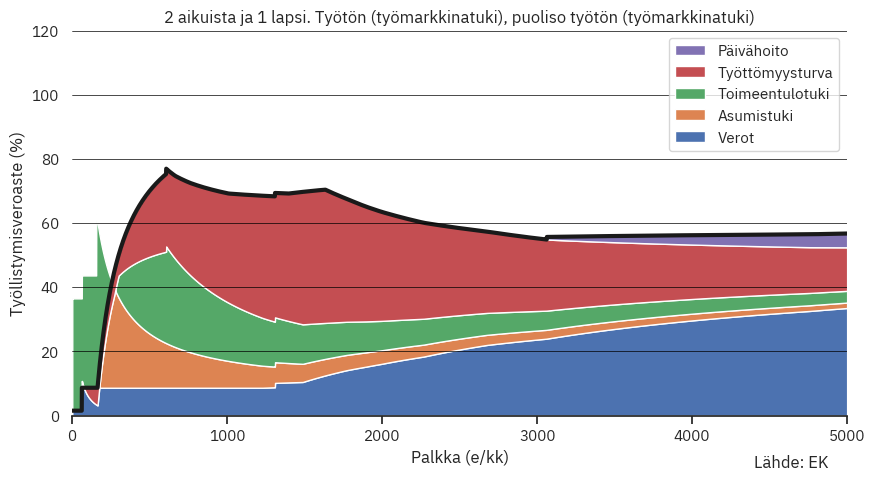

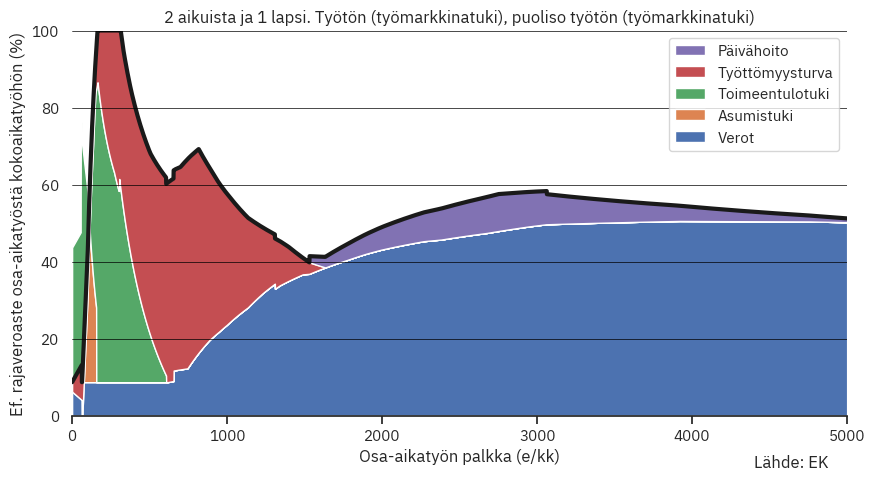

In [17]:
# ja lasketaan & plotataan tulokset
margHOrev.laske_ja_plottaa_marginaalit(p,plot_tva=True,figname=imagedir+'ho_gs_',
                                 grayscale=False,incl_perustulo=False,incl_elake=False,incl_alv=include_alv,
                                 incl_opintotuki=False,max_salary=max_salary,min_salary=min_salary,
                                    otsikko="HO",otsikkobase="nykytila")

Jaotellaan vielä marginaalit niiden lähteiden mukaan. Nettopalkka sisältää kaikkien talouden aikuisten nettopalkat, kun taas vaaka-akselin Palkka tarkoittaa työllistyvän palkkaa.

# siirtymä työttömästä töihin

1 aikuinen, ei lapsia. Töissä, ei puolisoa
1 aikuinen, ei lapsia. Työtön (ansiopvraha, peruste 2500 e/kk), ei puolisoa


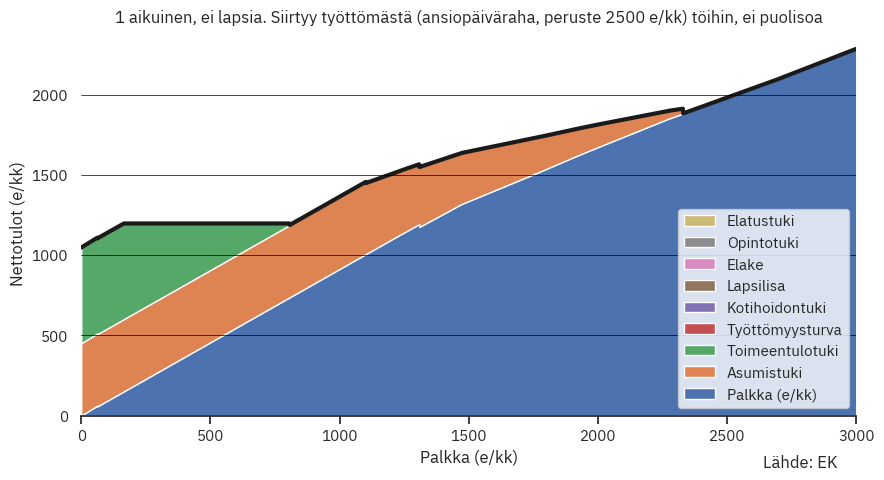

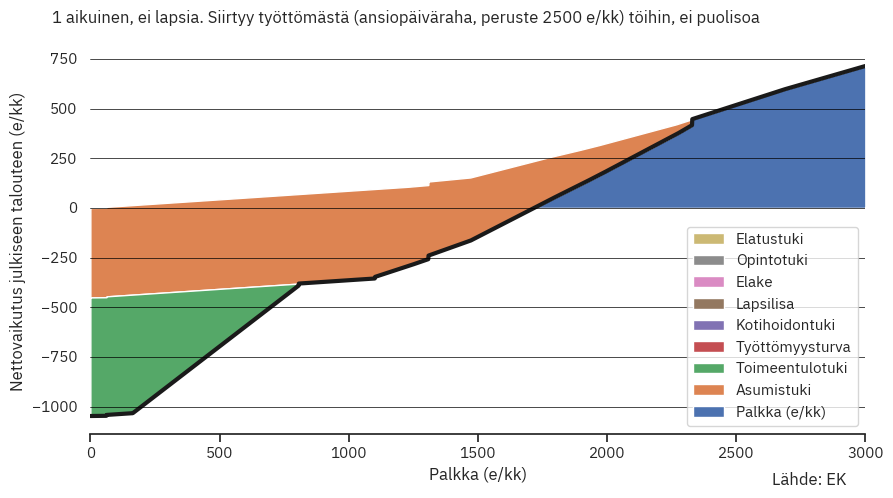

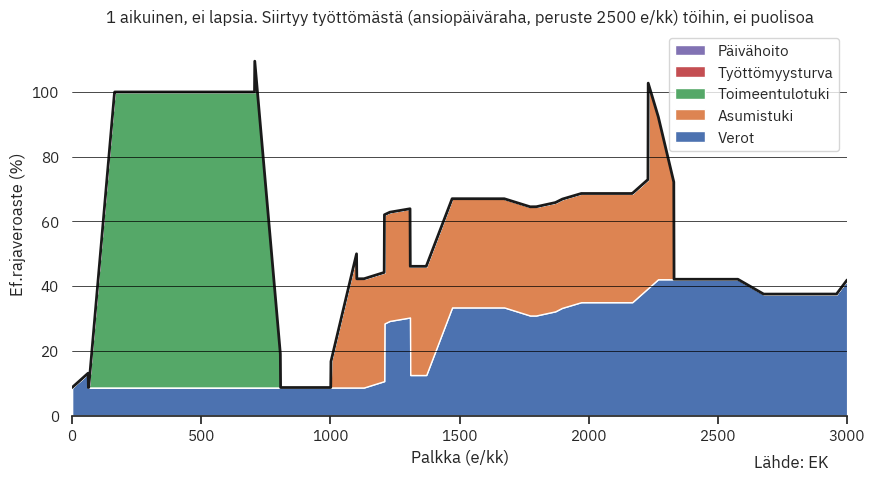

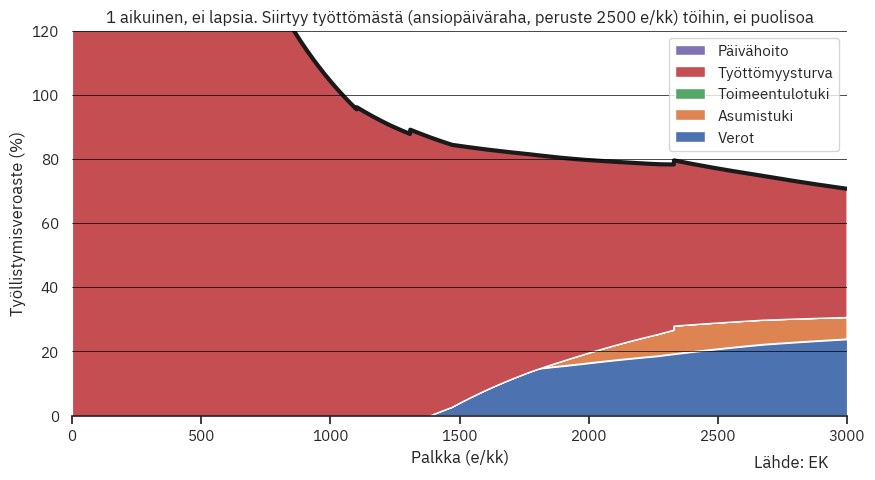

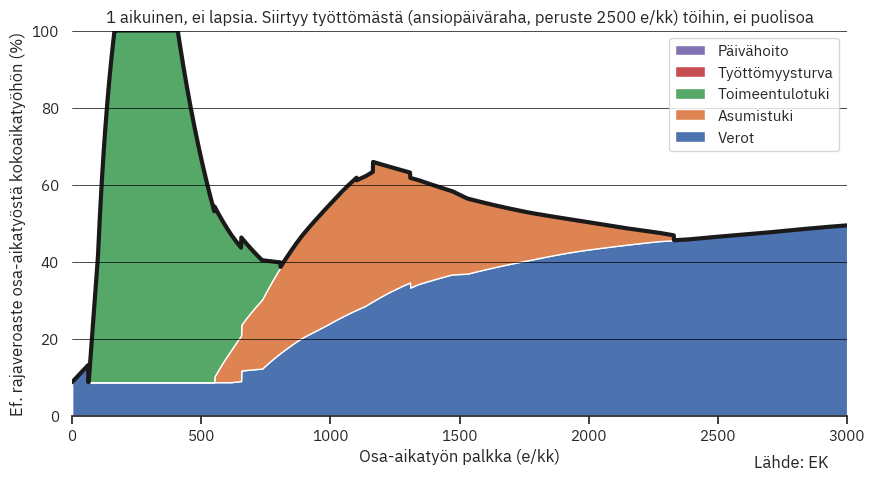

In [18]:
p1,selite1=fin_benefits.perheparametrit(perhetyyppi=1,tulosta=True)
p2,selite2=fin_benefits.perheparametrit(perhetyyppi=2,tulosta=True)

# ja lasketaan & plotataan tulokset
marg.laske_ja_plottaa_marginaalit(p1,p2,plot_tva=True,figname='huoltaja_gs_',
                                 grayscale=False,incl_perustulo=False,incl_elake=False,incl_alv=False,
                                 incl_opintotuki=False,max_salary=3000)

Perustuloon liittyy myös kasvavan etuusmenon rahoitus. Tämä toteutetaan nostamalla veroja. 

# Kirjallisuus

[1] Viitamäki, H. Työnteon kannustimet - mitä jää käteen? VATT muistiot 50, https://vatt.fi/documents/2956369/3012213/muistio_50.pdf, 2015

[2] Kärkkäinen, O., Tervola, J. Talouspolitiikan vaikutukset tuloeroihin ja työllisyyteen 2015–2018, Valtioneuvoston selvitys- ja tutkimustoiminnan julkaisusarja 59/2018, http://julkaisut.valtioneuvosto.fi/handle/10024/161061, 2018